In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("icome.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

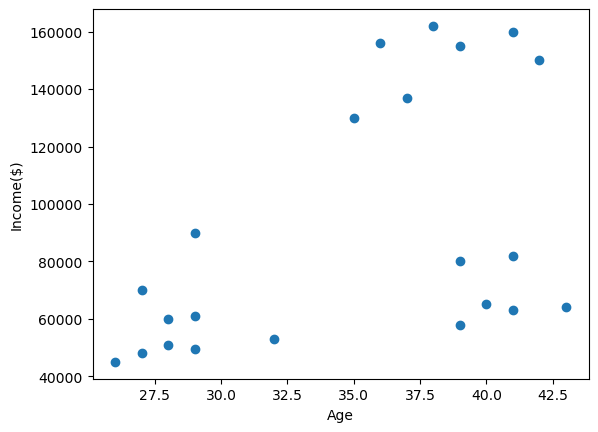

In [5]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [6]:
#by observing diagram let take 3 clusters
km = KMeans(n_clusters=3)# line creates a KMeans object called km. The n_clusters parameter is set to 3,    ............
#.......................which means the algorithm will try to cluster the data into three groups or clusters.
y_predicted = km.fit_predict(df[['Age','Income($)']])#line fits the KMeans model to the data and predicts the  ...........
#..........cluster labels for each data point based on the features 'Age' and 'Income($)'.and store in y_predicted
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster']=y_predicted#adding 'cluster' column to the DataFrame and store values of array y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
km.cluster_centers_#gives 3 clusters centers

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

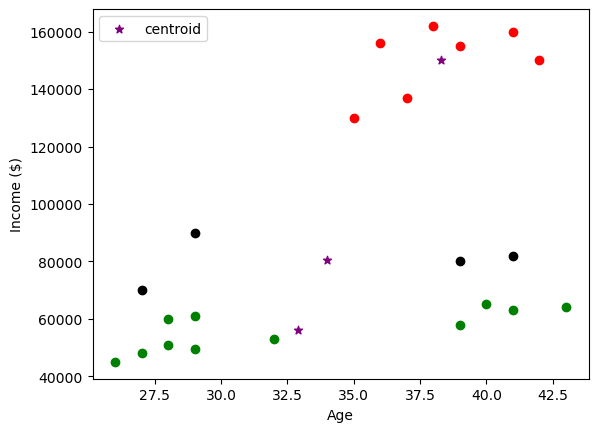

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#..........[:,0]: This slicing operation is used to extract the x-coordinate (first feature) of all the   .....
#..........centroids. The comma before 0 indicates that we want to take all rows (centroids) and only     .....
#..........the first column (x-coordinate).   .......
#.........[:,1]: Similarly, this slicing operation extracts the y-coordinate (second feature) of all the centroids.
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

Preprocessing using min max scaler

In [10]:
scaler = MinMaxScaler()#The MinMaxScaler scales the data by transforming it to a    ............
#............given range (by default, between 0 and 1)

scaler.fit(df[['Income($)']])#line fits the MinMaxScaler to the 'Income($)' column
df['Income($)'] = scaler.transform(df[['Income($)']])#line applies the scaling transformation to the 'Income($)' column

scaler.fit(df[['Age']])# line fits the MinMaxScaler to the 'Age' column
df['Age'] = scaler.transform(df[['Age']])#line applies the scaling transformation to the 'Age' column
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


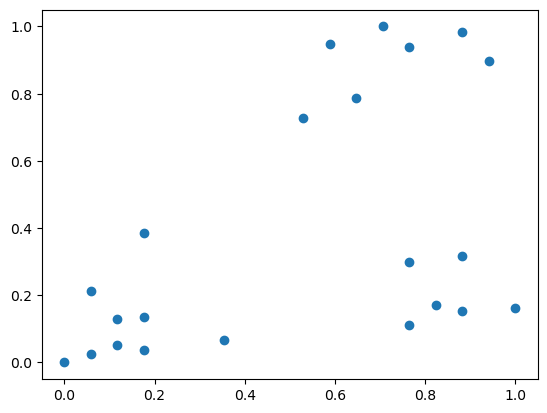

In [11]:
plt.scatter(df.Age,df['Income($)'])

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [14]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

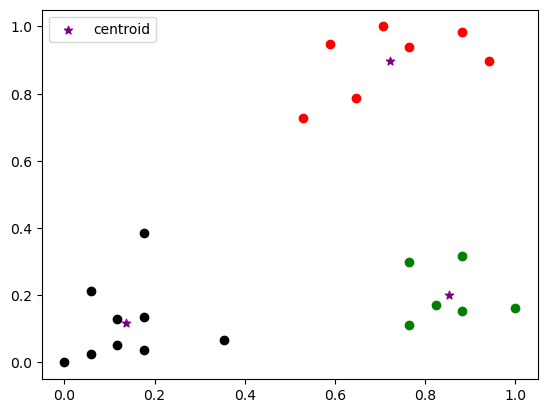

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow Plot

In [16]:
sse = []# line initializes an empty list called sse, which will be used to      ............
#..............store the SSE values for different values of k.
k_rng = range(1,10)# line creates a range of integers from 1 to 9
for k in k_rng:
    km = KMeans(n_clusters=k)#KMeans object km is created with the current value of k as the number of clusters.
    km.fit(df[['Age','Income($)']])#KMeans algorithm is fit to the data with the           ..............
    #........features 'Age' and 'Income($)' as inputs. It tries to cluster the             ..............
    #................data into k clusters based on these two features.
    sse.append(km.inertia_)#The inertia represents the sum of squared distances of each data  ...........
    #........point to its assigned cluster center. This value is then appended to the sse list.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


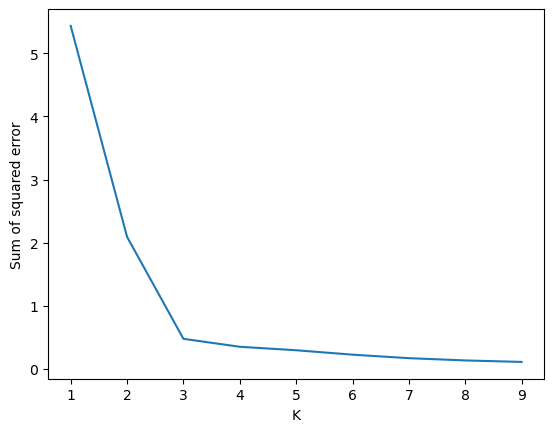

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)